<a href="https://colab.research.google.com/github/sanskriti-iyer/NLP-chatbot/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("C:/Users/obinn/Documents/RUTGERS SHP/COURSEWORK/SPRING 2025/NATURAL LANGUAGE PROCESSING/ASSIGNMENTS AND PROJECT/Project/data.csv")

In [ ]:
df.head(10)

,Facility ID,Facility Name,State,County/Parish,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value
0,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,75,Not Applicable
1,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",Not Applicable,7,Not Applicable
2,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,18,Not Applicable
3,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,Not Applicable,89
4,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,2,Not Applicable,Not Applicable
5,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_NURSE_RESPECT_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" treated them with courtesy and...",Not Applicable,83,Not Applicable
6,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_NURSE_RESPECT_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" treated them wit...",Not Applicable,5,Not Applicable
7,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_NURSE_RESPECT_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" treated them with courtesy a...",Not Applicable,12,Not Applicable
8,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_NURSE_LISTEN_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" listened carefully",Not Applicable,73,Not Applicable
9,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_NURSE_LISTEN_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" listened carefully",Not Applicable,7,Not Applicable


In [ ]:
##Checking for missing variables
df.isna().sum()

Facility ID                   0
Facility Name                 0
State                         0
County/Parish                 0
HCAHPS Measure ID             0
HCAHPS Question               0
HCAHPS Answer Description     0
Patient Survey Star Rating    0
HCAHPS Answer Percent         0
HCAHPS Linear Mean Value      0
dtype: int64

In [ ]:
df.shape

(5952, 10)

In [ ]:
## Checking for number of hospitals in the dataset
print(df['Facility Name'].unique())
print(df['Facility Name'].nunique())

['HACKENSACK UNIVERSITY MEDICAL CENTER'
 'NEWARK BETH ISRAEL MEDICAL CENTER' 'PALISADES MEDICAL CENTER'
 'HUNTERDON MEDICAL CENTER' "ST MARY'S GENERAL HOSPITAL"
 'HOLY NAME MEDICAL CENTER' 'CLARA MAASS MEDICAL CENTER'
 'UNIVERSITY MEDICAL CENTER OF PRINCETON AT PLAINSBORO'
 'CAPE REGIONAL MEDICAL CENTER INC' 'VALLEY HOSPITAL'
 'COOPER UNIVERSITY HOSPITAL' 'MORRISTOWN MEDICAL CENTER'
 'CAREPOINT HEALTH-CHRIST HOSPITAL' 'CHILTON MEDICAL CENTER'
 "ST JOSEPH'S UNIVERSITY MEDICAL CENTER INC"
 'VA NEW JERSEY HEALTH CARE SYSTEM' 'WEST JERSEY HOSPITAL'
 'ROBERT WOOD JOHNSON UNIVERSITY HOSPITAL AT RAHWAY'
 'CAREPOINT HEALTH - BAYONNE MEDICAL CENTER'
 'TRINITAS REGIONAL MEDICAL CENTER' 'NEWTON MEDICAL CENTER'
 'VIRTUA OUR LADY OF LOURDES HOSPITAL' 'DEBORAH HEART AND LUNG CENTER'
 'INSPIRA MEDICAL CENTER VINELAND' 'RIVERVIEW MEDICAL CENTER'
 'ROBERT WOOD JOHNSON UNIVERSITY HOSPITAL' 'RARITAN BAY MEDICAL CENTER'
 'CAREPOINT HEALTH-HOBOKEN UNIVERSITY MEDICAL CENTER'
 'COMMUNITY MEDICAL CENTER' 'CAP

### Text Classification and Data Preparation

In [ ]:
# Text Classification - Question Grouping
theme_mapping = {
    'communication': ['communicate', 'explain', 'listen', 'understand', 'communication'],
    'responsiveness': ['help', 'response', 'call button', 'responsiveness'],
    'environment': ['clean', 'quiet', 'environment'],
    'medication': ['medicine', 'medication', 'side effects'],
    'discharge': ['discharge', 'leave hospital', 'recovery', 'discharge'],
    'experience': ['overall', 'recommend', 'courtesy', 'respect']
}

def classify_question(question):
    question = question.lower()
    for theme, keywords in theme_mapping.items():
        if any(keyword in question for keyword in keywords):
            return theme
    return 'other'


df['Theme'] = df['HCAHPS Question'].apply(classify_question)

In [ ]:
# Departmental Designation
department_mapping = {
    'doctors': ['doctor', 'physician'],
    'nurses': ['nurse'],
    'support staff': ['aide', 'assistant', 'staff', 'coordinator', 'technician'],
    'general staff': ['employee', 'personnel']
}

def assign_department(question):
    question = question.lower()
    for department, keywords in department_mapping.items():
        if any(keyword in question for keyword in keywords):
            return department
    return 'general'

df['Department'] = df['HCAHPS Question'].apply(assign_department)

In [ ]:
df.head()

,Facility ID,Facility Name,State,County/Parish,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Theme,Department
0,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,75,Not Applicable,communication,nurses
1,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",Not Applicable,7,Not Applicable,communication,nurses
2,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,18,Not Applicable,communication,nurses
3,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,Not Applicable,89,communication,nurses
4,310001,HACKENSACK UNIVERSITY MEDICAL CENTER,NJ,BERGEN,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,2,Not Applicable,Not Applicable,communication,nurses


In [ ]:
# Data Preparation - Categorize Percentages and Create Combined Column
def categorize_percentage(value):
    try:
        percentage = float(value)
        if percentage >= 60:
            return 'high'
        elif 40 <= percentage < 60:
            return 'medium'
        else:
            return 'low'
    except:
        return 'Not Applicable'

df['HCAHPS Answer Percent'] = df['HCAHPS Answer Percent'].replace('Not Applicable', None)
df['Response_Category'] = df['HCAHPS Answer Percent'].apply(categorize_percentage)
df['survey_response'] = df['HCAHPS Question'] + ' was ' + df['Response_Category']

# Create the new dataframe with selected columns
new_df = df[['Facility Name', 'HCAHPS Question', 'Theme', 'Department', 'Patient Survey Star Rating', 'survey_response' ]].copy()
new_df['Patient Survey Star Rating'] = pd.to_numeric(new_df['Patient Survey Star Rating'], errors='coerce')

In [ ]:
new_df.head()

,Facility Name,HCAHPS Question,Theme,Department,Patient Survey Star Rating,survey_response
0,HACKENSACK UNIVERSITY MEDICAL CENTER,"Patients who reported that their nurses ""Alway...",communication,nurses,NaN,"Patients who reported that their nurses ""Alway..."
1,HACKENSACK UNIVERSITY MEDICAL CENTER,"Patients who reported that their nurses ""Somet...",communication,nurses,NaN,"Patients who reported that their nurses ""Somet..."
2,HACKENSACK UNIVERSITY MEDICAL CENTER,"Patients who reported that their nurses ""Usual...",communication,nurses,NaN,"Patients who reported that their nurses ""Usual..."
3,HACKENSACK UNIVERSITY MEDICAL CENTER,Nurse communication - linear mean score,communication,nurses,NaN,Nurse communication - linear mean score was No...
4,HACKENSACK UNIVERSITY MEDICAL CENTER,Nurse communication - star rating,communication,nurses,2.0,Nurse communication - star rating was Not Appl...


### Data Pre-Processing

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
%%capture
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\obinn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\obinn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\obinn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\obinn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\obinn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Data Cleaning and Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

new_df['Cleaned_Text'] = new_df['survey_response'].astype(str).apply(preprocess_text)

In [ ]:
new_df['survey_response'][:10]

0    Patients who reported that their nurses "Alway...
1    Patients who reported that their nurses "Somet...
2    Patients who reported that their nurses "Usual...
3    Nurse communication - linear mean score was No...
4    Nurse communication - star rating was Not Appl...
5    Patients who reported that their nurses "Alway...
6    Patients who reported that their nurses "Somet...
7    Patients who reported that their nurses "Usual...
8    Patients who reported that their nurses "Alway...
9    Patients who reported that their nurses "Somet...
Name: survey_response, dtype: object

### Sentiment Analysis using VADER(Valence Aware Dictionary and sEntiment Reasoner) Model

In [ ]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment, compound_score

new_df[['Sentiment', 'Sentiment_Score']] = new_df['Cleaned_Text'].apply(lambda x: pd.Series(get_sentiment_score(x)))

In [ ]:
new_df

,Facility Name,HCAHPS Question,Theme,Department,Patient Survey Star Rating,survey_response,Cleaned_Text,Sentiment,Sentiment_Score
0,HACKENSACK UNIVERSITY MEDICAL CENTER,"Patients who reported that their nurses ""Alway...",communication,nurses,NaN,"Patients who reported that their nurses ""Alway...",patient reported nurse `` always '' communicat...,Positive,0.2732
1,HACKENSACK UNIVERSITY MEDICAL CENTER,"Patients who reported that their nurses ""Somet...",communication,nurses,NaN,"Patients who reported that their nurses ""Somet...",patient reported nurse `` sometimes '' `` neve...,Negative,-0.4430
2,HACKENSACK UNIVERSITY MEDICAL CENTER,"Patients who reported that their nurses ""Usual...",communication,nurses,NaN,"Patients who reported that their nurses ""Usual...",patient reported nurse `` usually '' communica...,Neutral,0.0000
3,HACKENSACK UNIVERSITY MEDICAL CENTER,Nurse communication - linear mean score,communication,nurses,NaN,Nurse communication - linear mean score was No...,nurse communication - linear mean score applic...,Neutral,0.0000
4,HACKENSACK UNIVERSITY MEDICAL CENTER,Nurse communication - star rating,communication,nurses,2.0,Nurse communication - star rating was Not Appl...,nurse communication - star rating applicable,Neutral,0.0000
...,...,...,...,...,...,...,...,...,...
5947,WEISMAN CHILDRENS REHABILITATION HOSPITAL,"Patients who reported YES, they would definite...",experience,general,NaN,"Patients who reported YES, they would definite...","patient reported yes , would definitely recomm...",Positive,0.7845
5948,WEISMAN CHILDRENS REHABILITATION HOSPITAL,"Patients who reported YES, they would probably...",experience,general,NaN,"Patients who reported YES, they would probably...","patient reported yes , would probably recommen...",Positive,0.6369
5949,WEISMAN CHILDRENS REHABILITATION HOSPITAL,Recommend hospital - linear mean score,experience,general,NaN,Recommend hospital - linear mean score was Not...,recommend hospital - linear mean score applicable,Positive,0.3612
5950,WEISMAN CHILDRENS REHABILITATION HOSPITAL,Recommend hospital - star rating,experience,general,NaN,Recommend hospital - star rating was Not Appli...,recommend hospital - star rating applicable,Positive,0.3612


In [ ]:
# Analysis by Facility and Theme
facility_theme_performance = new_df.groupby(['Facility Name', 'Theme']).agg(
    Avg_Star_Rating=('Patient Survey Star Rating', 'mean'),
    Avg_Sentiment_Score=('Sentiment_Score', 'mean')
).reset_index()

# Derive Sentiment Category from Avg_Sentiment_Score
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

facility_theme_performance['Avg_Sentiment'] = facility_theme_performance['Avg_Sentiment_Score'].apply(classify_sentiment)

facility_theme_performance.head()


,Facility Name,Theme,Avg_Star_Rating,Avg_Sentiment_Score,Avg_Sentiment
0,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,communication,3.000000,-0.074813,Negative
1,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,discharge,3.000000,0.042900,Neutral
2,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,environment,1.500000,-0.010530,Neutral
3,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,experience,3.000000,0.373054,Positive
4,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,medication,NaN,-0.089650,Negative
5,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,other,3.000000,0.136293,Positive
6,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,responsiveness,3.000000,0.122377,Positive
7,BAYSHORE MEDICAL CENTER,communication,2.666667,-0.074813,Negative
8,BAYSHORE MEDICAL CENTER,discharge,3.000000,0.042900,Neutral
9,BAYSHORE MEDICAL CENTER,environment,2.500000,-0.010530,Neutral


In [ ]:
#Analysis by Facility and Department
facility_department_performance = new_df.groupby(['Facility Name', 'Department']).agg(
    Avg_Star_Rating=('Patient Survey Star Rating', 'mean'),
    Avg_Sentiment_Score=('Sentiment_Score', 'mean')).reset_index()

# Derive Sentiment Category from Avg_Sentiment_Score
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

facility_department_performance['Avg_Sentiment'] = facility_department_performance['Avg_Sentiment_Score'].apply(classify_sentiment)

facility_department_performance.head()

,Facility Name,Department,Avg_Star_Rating,Avg_Sentiment_Score,Avg_Sentiment
0,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,doctors,3.000,0.007036,Neutral
1,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,general,2.625,0.104124,Positive
2,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,nurses,3.000,0.007036,Neutral
3,ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS,support staff,3.000,0.024821,Neutral
4,BAYSHORE MEDICAL CENTER,doctors,2.000,0.007036,Neutral
5,BAYSHORE MEDICAL CENTER,general,2.875,0.104124,Positive
6,BAYSHORE MEDICAL CENTER,nurses,3.000,0.007036,Neutral
7,BAYSHORE MEDICAL CENTER,support staff,2.000,0.044336,Neutral
8,BERGEN NEW BRIDGE MEDICAL CENTER,doctors,NaN,0.007036,Neutral
9,BERGEN NEW BRIDGE MEDICAL CENTER,general,NaN,0.096439,Positive


### Visualizations to Understand the Relationship Between Sentiment Scores and Star Ratings

What facility do you want to explore?  BAYSHORE MEDICAL CENTER


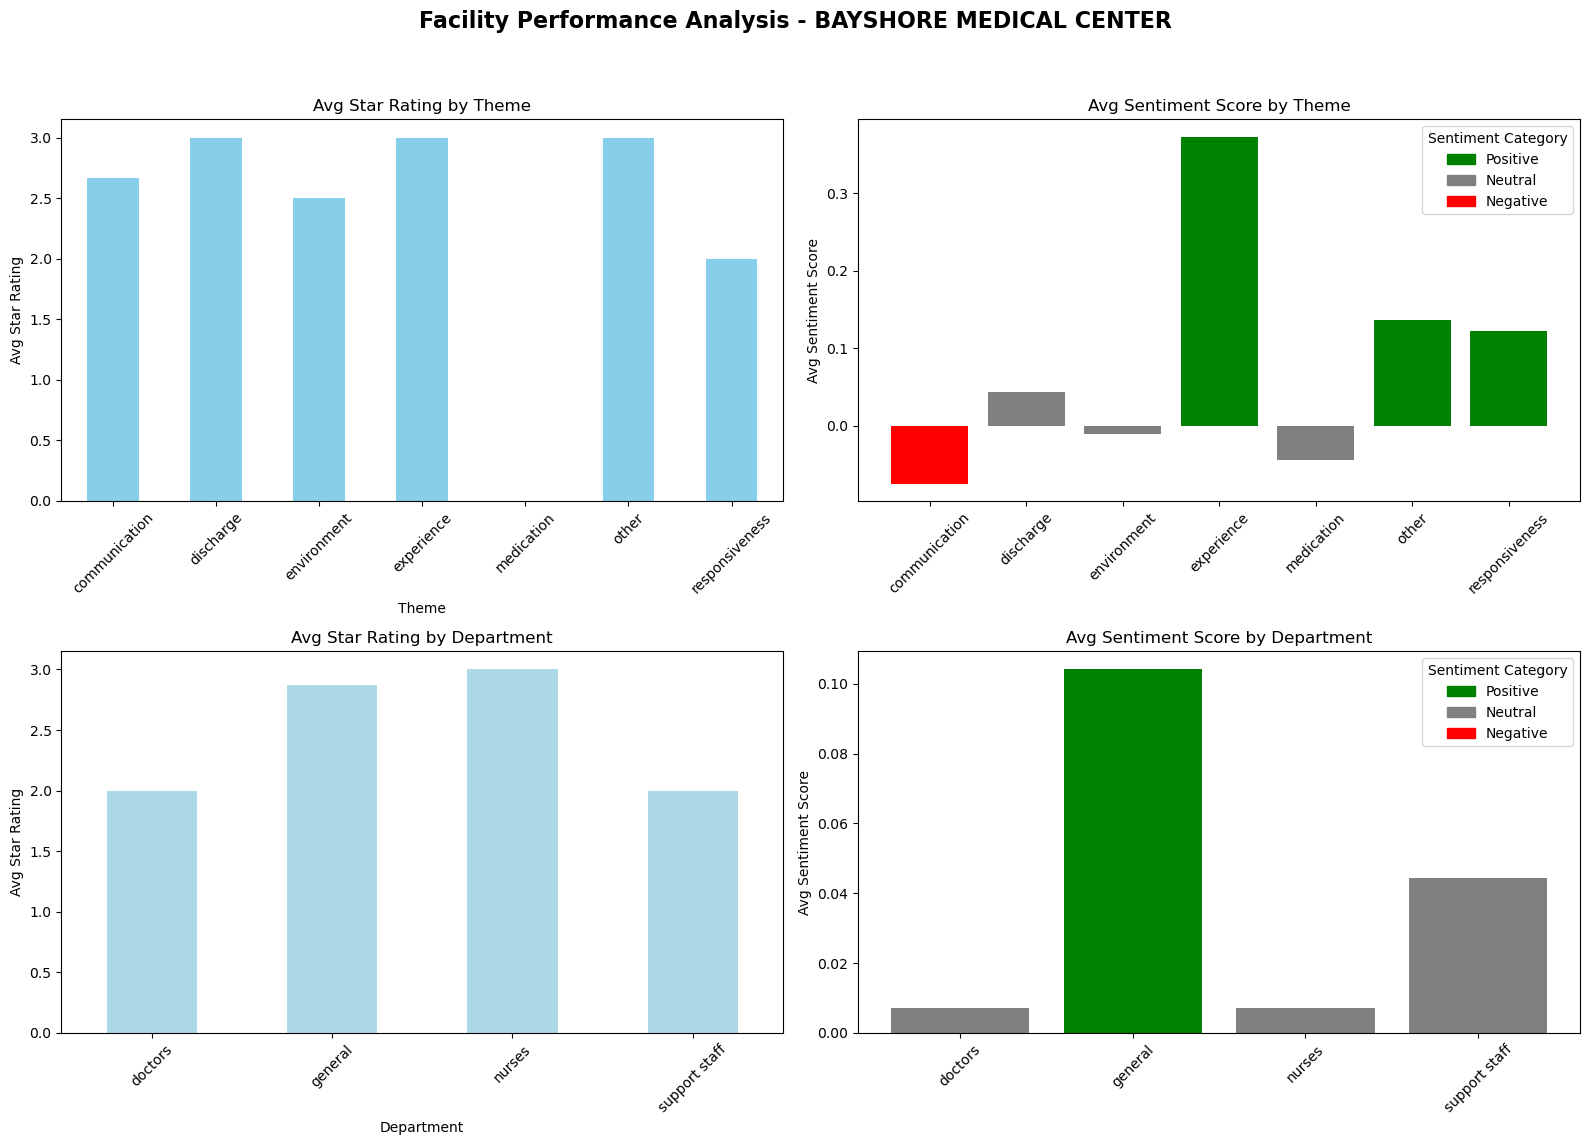

In [ ]:
## VISUALIZATIONS TO UNDERSTAND SENTIMENT SCORES AND STAR RATINGS
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Function to classify sentiment based on average sentiment score
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

def generate_facility_visualizations(df, facility_name):
    # Filter data by the selected facility
    facility_data = df[df['Facility Name'] == facility_name].copy()

    # Grouped data for themes
    theme_star = facility_data.groupby('Theme')['Patient Survey Star Rating'].mean()
    theme_sentiment = facility_data.groupby('Theme')['Sentiment_Score'].mean()

    # Grouped data for departments
    dept_star = facility_data.groupby('Department')['Patient Survey Star Rating'].mean()
    dept_sentiment = facility_data.groupby('Department')['Sentiment_Score'].mean()

    # Theme Performance
    theme_performance = facility_data.groupby('Theme').agg(
        Avg_Star_Rating=('Patient Survey Star Rating', 'mean'),
        Avg_Sentiment_Score=('Sentiment_Score', 'mean')
    ).reset_index()

    # Department Performance
    dept_performance = facility_data.groupby('Department').agg(
        Avg_Star_Rating=('Patient Survey Star Rating', 'mean'),
        Avg_Sentiment_Score=('Sentiment_Score', 'mean')
    ).reset_index()

    # Derive Sentiment Category for Themes and Departments
    theme_performance['Avg_Sentiment'] = theme_performance['Avg_Sentiment_Score'].apply(classify_sentiment)
    dept_performance['Avg_Sentiment'] = dept_performance['Avg_Sentiment_Score'].apply(classify_sentiment)

    # Assign colors based on sentiment classification
    color_map = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
    theme_colors = theme_performance['Avg_Sentiment'].map(color_map)
    dept_colors = dept_performance['Avg_Sentiment'].map(color_map)

    # Create subplots (2 rows, 2 columns)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Facility Performance Analysis - {facility_name}', fontsize=16, fontweight='bold')

    # 1. Average Star Rating by Theme
    theme_star.plot(kind='bar', color='skyblue', ax=axes[0, 0])
    axes[0, 0].set_title('Avg Star Rating by Theme')
    axes[0, 0].set_ylabel('Avg Star Rating')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # 2. Average Sentiment Score by Theme (Colored by Sentiment)
    axes[0, 1].bar(theme_performance['Theme'], theme_performance['Avg_Sentiment_Score'], color=theme_colors)
    axes[0, 1].set_title('Avg Sentiment Score by Theme')
    axes[0, 1].set_ylabel('Avg Sentiment Score')
    axes[0, 1].tick_params(axis='x', rotation=45)
    sentiment_patches = [mpatches.Patch(color=color_map[label], label=label) for label in color_map.keys()]
    axes[0, 1].legend(handles=sentiment_patches, title="Sentiment Category", loc="upper right")

    # 3. Average Star Rating by Department
    dept_star.plot(kind='bar', color='lightblue', ax=axes[1, 0])
    axes[1, 0].set_title('Avg Star Rating by Department')
    axes[1, 0].set_ylabel('Avg Star Rating')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. Average Sentiment Score by Department (Colored by Sentiment)
    axes[1, 1].bar(dept_performance['Department'], dept_performance['Avg_Sentiment_Score'], color=dept_colors)
    axes[1, 1].set_title('Avg Sentiment Score by Department')
    axes[1, 1].set_ylabel('Avg Sentiment Score')
    axes[1, 1].tick_params(axis='x', rotation=45)
    sentiment_patches = [mpatches.Patch(color=color_map[label], label=label) for label in color_map.keys()]
    axes[1, 1].legend(handles=sentiment_patches, title="Sentiment Category", loc="upper right")

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Get user input
facility_name = input("What facility do you want to explore? ").upper()
generate_facility_visualizations(new_df, facility_name)


What facility do you want to explore?  ATLANTICARE REGIONAL MEDICAL CENTER - CITY CAMPUS


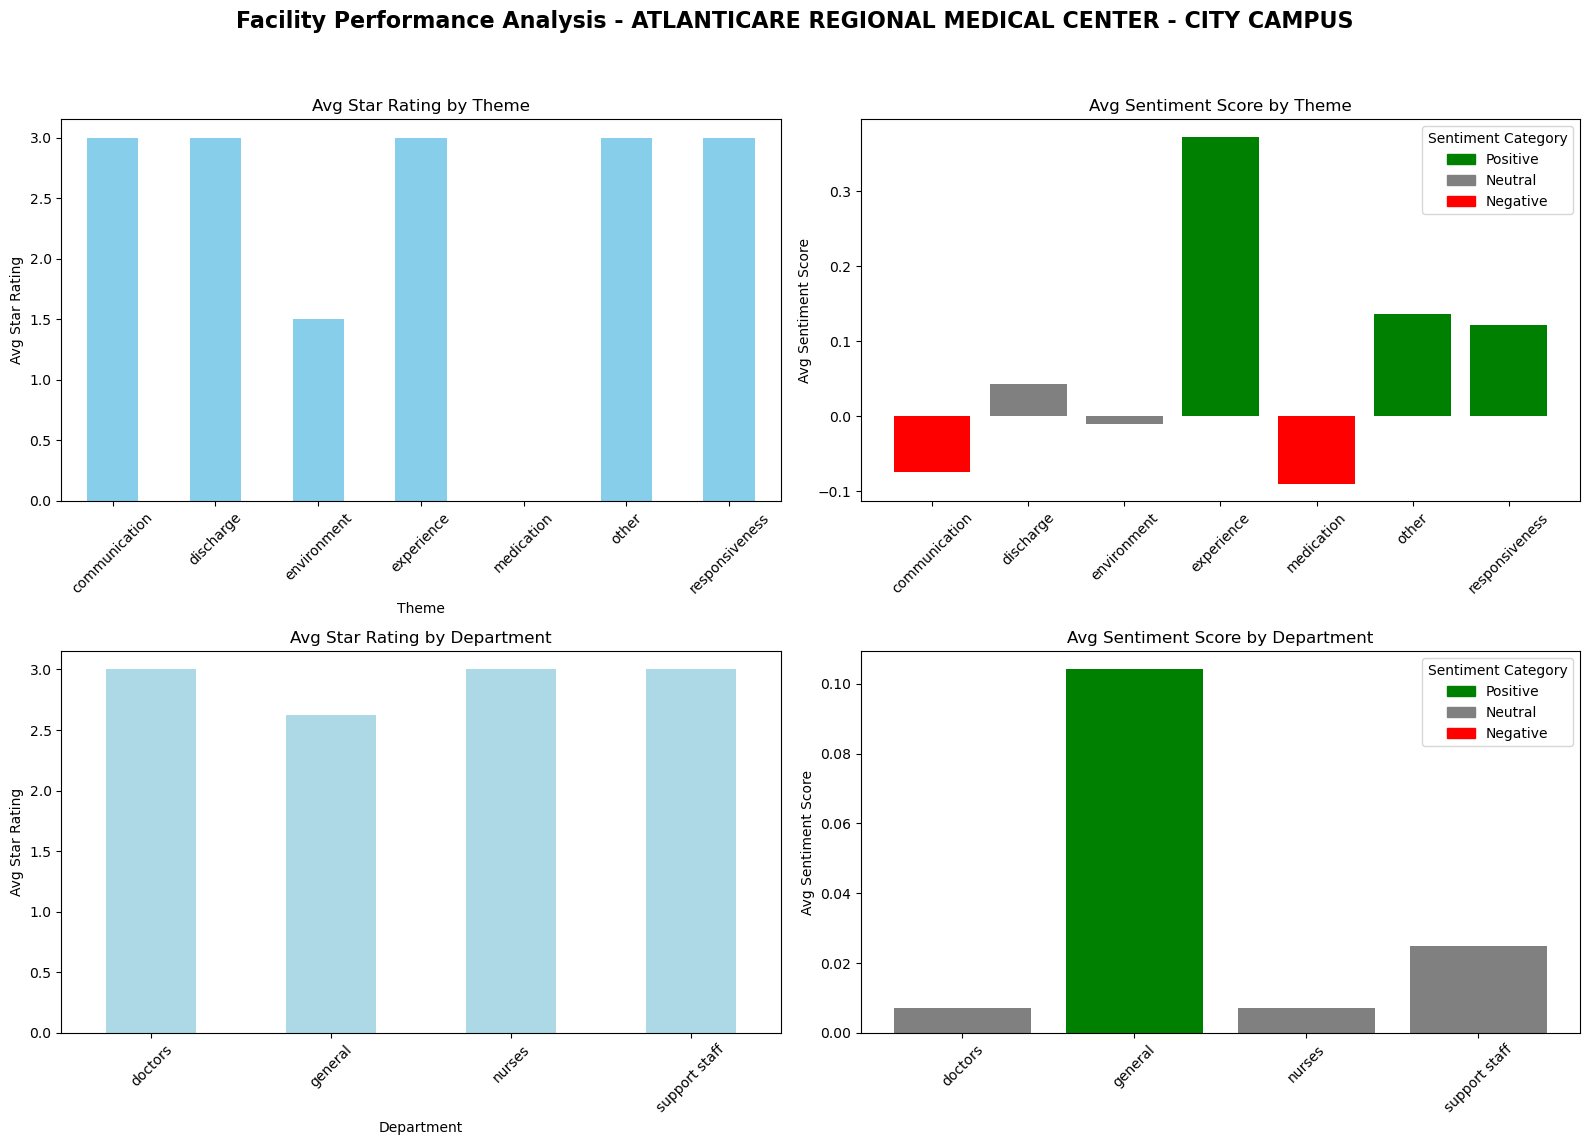

In [ ]:
facility_name = input("What facility do you want to explore? ").upper()
generate_facility_visualizations(new_df, facility_name)

What facility do you want to explore?  CHILTON MEDICAL CENTER


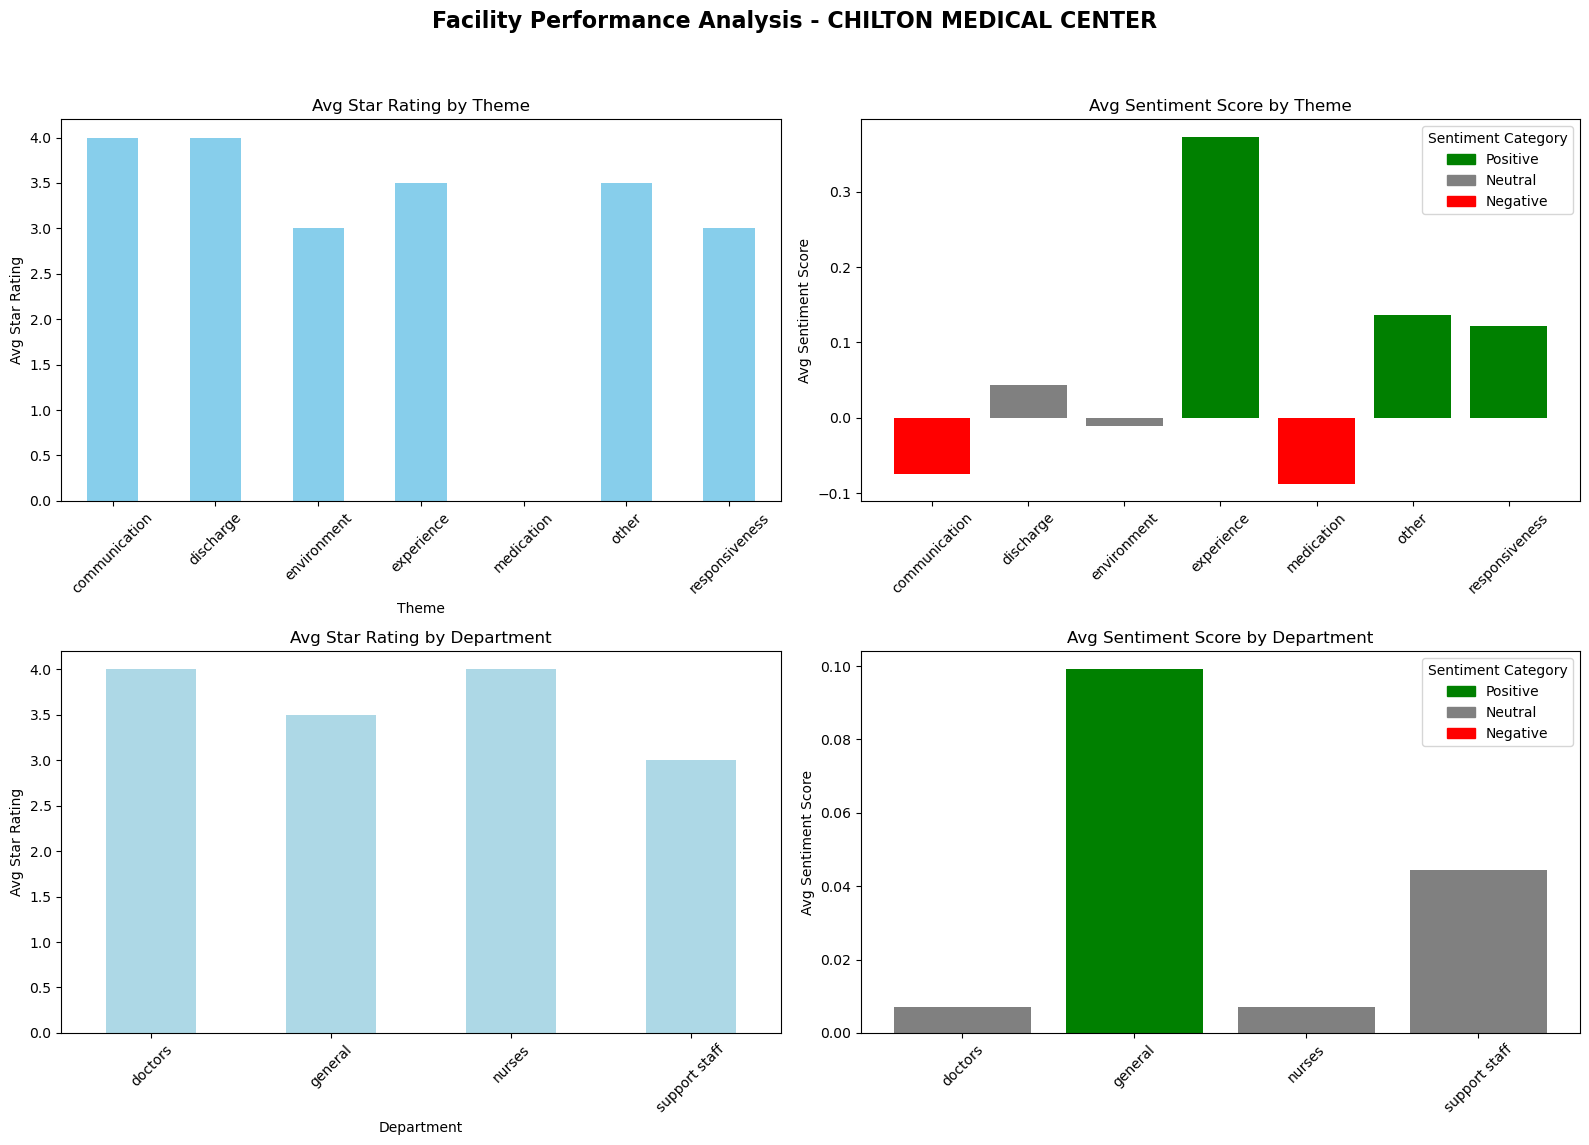

In [ ]:
facility_name = input("What facility do you want to explore? ").upper()
generate_facility_visualizations(new_df, facility_name)

What facility do you want to explore?  ROBERT WOOD JOHNSON UNIVERSITY HOSPITAL


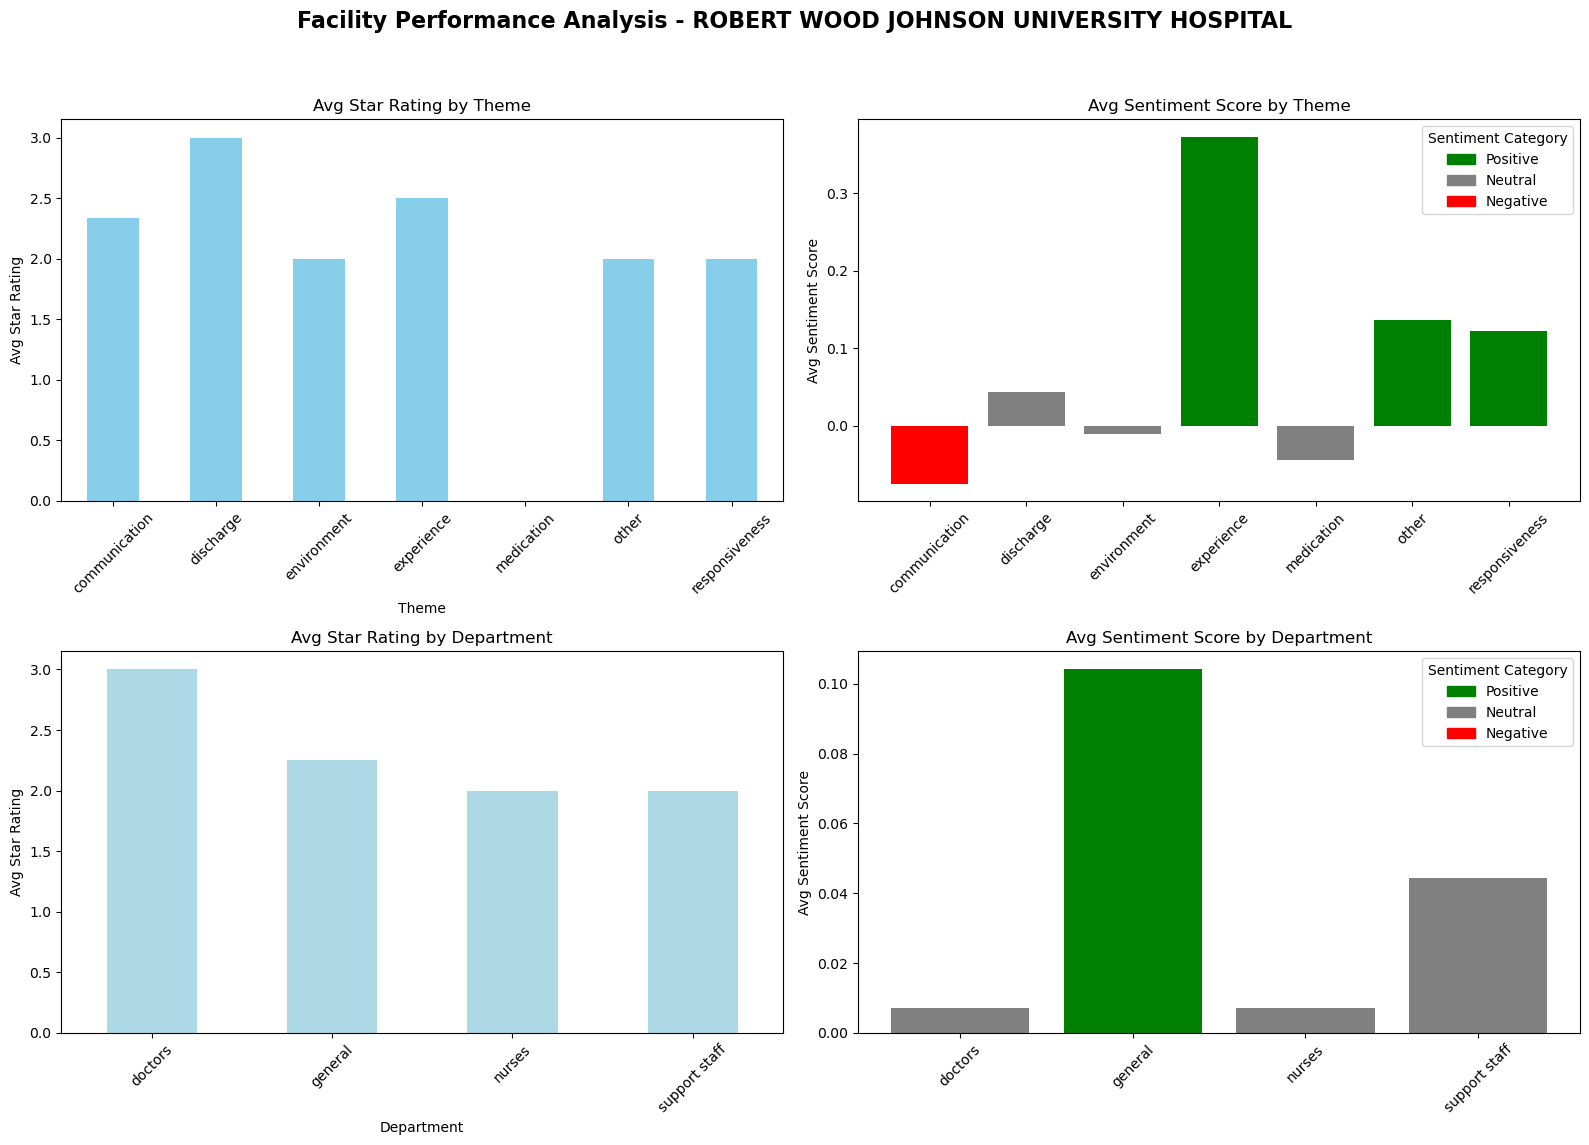

In [ ]:
facility_name = input("What facility do you want to explore? ").upper()
generate_facility_visualizations(new_df, facility_name)